# Impacto de la deforestación en el regimen de caudales de los rios en Colombia (TEAM 28)

## Multivariate time series forecasting

### Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

### Read data

In [2]:
macrodata = pd.read_csv('../data/matrix/matrix_consol_v2.zip')

macrodata.head(10)

date  year  month  mc  v_flow_mean  v_loss_cover  v_rainfall_total  \
0  2000-01  2000      1   7        230.4      0.000000             334.0   
1  2000-02  2000      2   7        272.4      0.000133             400.0   
2  2000-03  2000      3   7        321.6      0.000265             319.0   
3  2000-04  2000      4   7        310.8      0.000398             248.0   
4  2000-05  2000      5   7        410.0      0.000531             302.0   
5  2000-06  2000      6   7        295.9      0.000663              81.0   
6  2000-07  2000      7   7        244.2      0.000796              96.0   
7  2000-08  2000      8   7        255.0      0.000928              64.0   
8  2000-09  2000      9   7        233.8      0.001061             262.0   
9  2000-10  2000     10   7        216.0      0.001194             141.0   

   v_temperature_mean  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8                 NaN  
9                 NaN

In [3]:
macrodata.tail(10)

date  year  month  mc  v_flow_mean  v_loss_cover  v_rainfall_total  \
11510  2019-03  2019      3  33         4.83      0.026057            175.37   
11511  2019-04  2019      4  33         4.93      0.026114            181.34   
11512  2019-05  2019      5  33         3.52      0.026170            392.25   
11513  2019-06  2019      6  33         3.11      0.026226            200.79   
11514  2019-07  2019      7  33         2.52      0.026282             41.01   
11515  2019-08  2019      8  33         2.13      0.026338             64.80   
11516  2019-09  2019      9  33         1.92      0.026394              4.00   
11517  2019-10  2019     10  33         3.36      0.026450            144.27   
11518  2019-11  2019     11  33         5.60      0.026507            273.98   
11519  2019-12  2019     12  33         8.11      0.026563            584.98   

       v_temperature_mean  
11510                 NaN  
11511                 NaN  
11512                 NaN  
11513                 NaN  
11514                 NaN  
11515                 NaN  
11516                 NaN  
11517                 NaN  
11518                 NaN  
11519                 NaN

In [4]:
data = macrodata.iloc[:, 3:7]

data.head(10)

mc  v_flow_mean  v_loss_cover  v_rainfall_total
0   7        230.4      0.000000             334.0
1   7        272.4      0.000133             400.0
2   7        321.6      0.000265             319.0
3   7        310.8      0.000398             248.0
4   7        410.0      0.000531             302.0
5   7        295.9      0.000663              81.0
6   7        244.2      0.000796              96.0
7   7        255.0      0.000928              64.0
8   7        233.8      0.001061             262.0
9   7        216.0      0.001194             141.0

In [5]:
# Option
#from sklearn import preprocessing
#x = df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pd.DataFrame(x_scaled)

# Option
#from sklearn import preprocessing
#data_norm = data.iloc[:, 1:4]
#data_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data_norm.values), 
#                         index = data_norm.index, columns = data_norm.columns)
#data_norm.head(10)

# Option
#from sklearn import preprocessing
#data_norm_mc = data.iloc[:, 0].copy()
#data_norm = data.iloc[:, 1:4].copy()
#data_norm = pd.DataFrame(preprocessing.normalize(data_norm))
#data_norm.columns = ['v_flow_mean', 'v_loss_cover', 'v_rainfall_total']
#data_norm = pd.concat([data_norm_mc, data_norm], axis = 1)
#data_norm.head()

# Option
#df_norm = (df - df.mean()) / (df.max() - df.min())

# Option
# data_norm = data.copy()
# data_norm.loc[:, 'v_flow_mean'] = data_norm['v_flow_mean'].apply(lambda x : x * 100.0)
# data_norm.loc[:, 'v_loss_cover'] = data_norm['v_loss_cover'].apply(lambda x : x * 1000.0)
# data_norm.head()

In [10]:
mcs = data['mc'].unique()
mcs.sort()

print(mcs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


In [11]:
#Input = [100.7689454, 17.232999, 60.98867, 300.83748789] 
#Output = ["%.2f" % elem for elem in Input] 
#print(Output) 

#Input = [[100.7689454, 17.232999, 60.98867, 300.83748789],
#         [100.7689454, 17.232999, 60.98867, 300.83748789],
#         [100.7689454, 17.232999, 60.98867, 300.83748789]
#        ]
#for line in Input:
#    columns = ["%3f" % cell for cell in line]
#    print(' '.join(columns))


In [12]:
for i in mcs:
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover', 
                                     'v_rainfall_total']].copy().reset_index(drop = True)
    model = VAR(temp_df)
    model_fit = model.fit()
    pred = model_fit.forecast(model_fit.y, steps = 6)
    print('MC = ', i)
    print('-------')
    for line in pred:
        columns = ["%3f" % cell for cell in line]
        print(' '.join(columns))
    print('\n')

/home/jwcalderon/anaconda3/envs/ds4a/lib/python3.8/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


MC =  1
-------
2.982908 0.077151 218.896907
3.091696 0.077433 176.938891
3.137689 0.077706 156.905666
3.157007 0.077975 147.449353
3.165371 0.078241 143.048963
3.169449 0.078506 141.042234


MC =  2
-------
24.275466 0.061510 218.283308
23.941139 0.061919 210.369276
23.877050 0.062330 209.372739
23.859190 0.062742 209.105711
23.857852 0.063157 209.030819
23.863730 0.063573 209.034767


MC =  3
-------
136.585787 0.026413 170.474300
147.818050 0.026525 163.364612
153.894729 0.026638 162.108657
157.364123 0.026753 162.347470
159.416111 0.026869 162.837482
160.659687 0.026985 163.270719


MC =  4
-------
5.063560 0.083304 191.660181
6.429002 0.083683 188.796416
7.297833 0.084066 207.669822
7.742792 0.084452 221.127251
7.949032 0.084840 228.428736
8.036772 0.085228 232.064739


MC =  5
-------
65.600252 0.032603 94.312613
67.388373 0.032727 94.026776
68.557432 0.032851 95.875938
69.396545 0.032976 97.260496
70.004057 0.033101 98.249678
70.446588 0.033226 98.954951


MC =  6
-------
20.133

### Time series Exploratory Data Analysis 

In [13]:
# loading essential libraries first
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

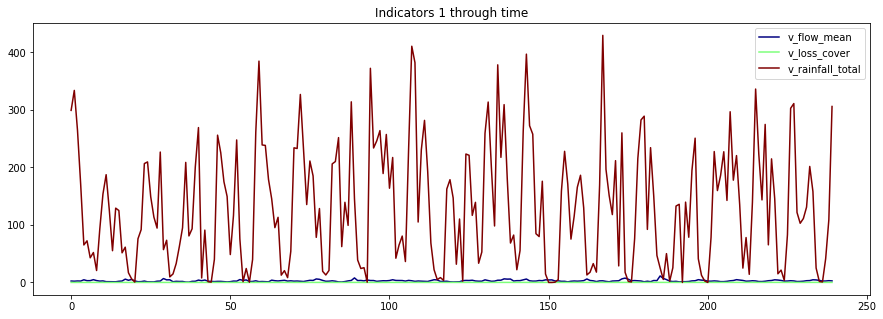

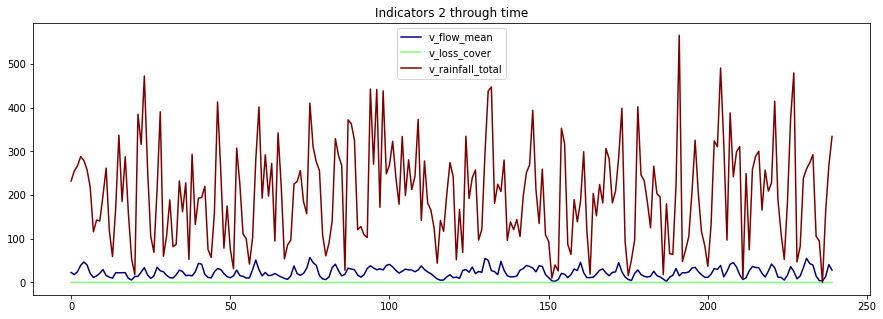

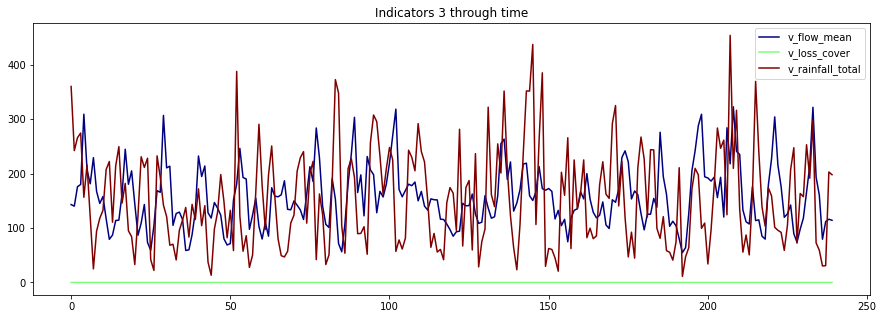

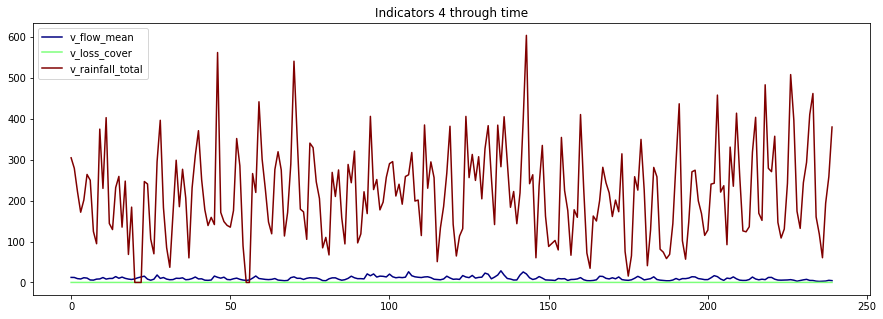

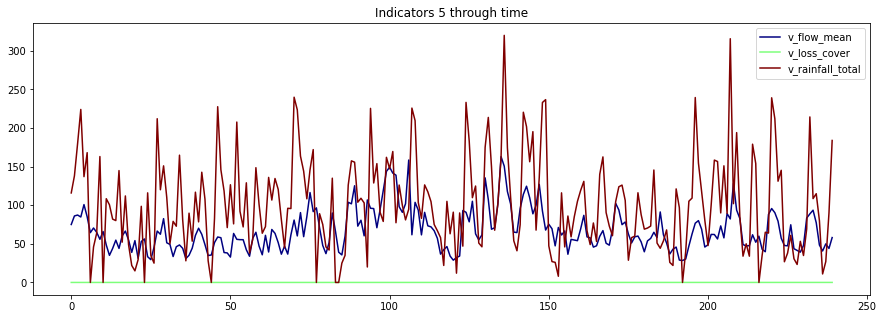

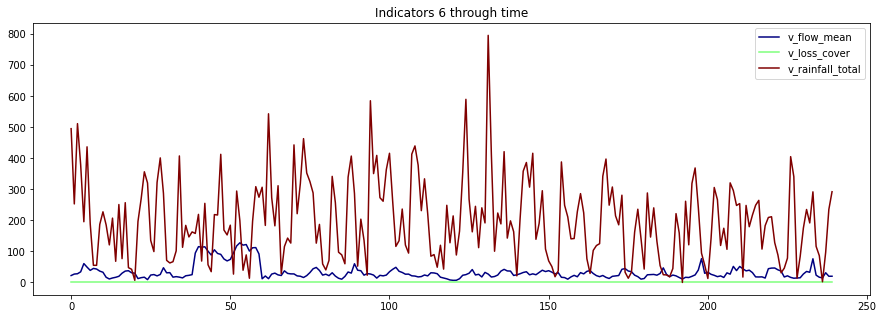

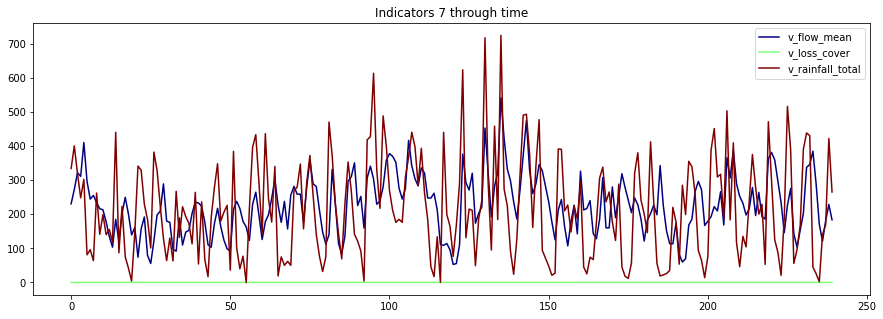

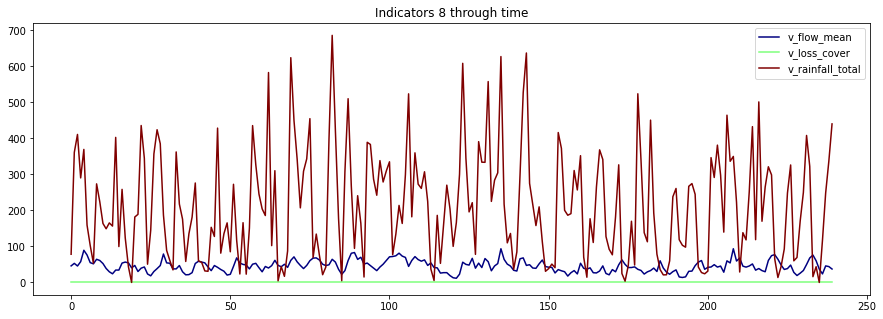

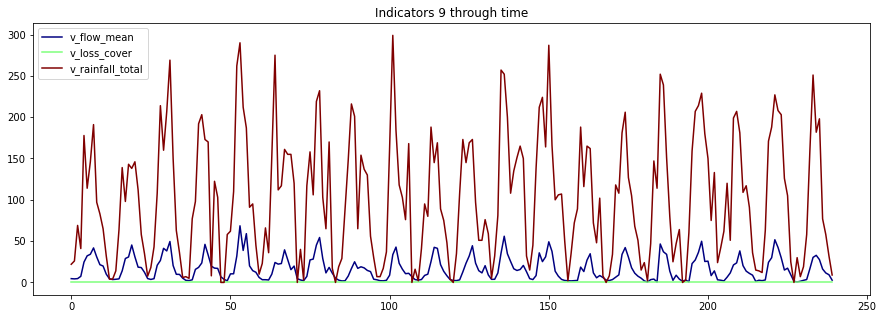

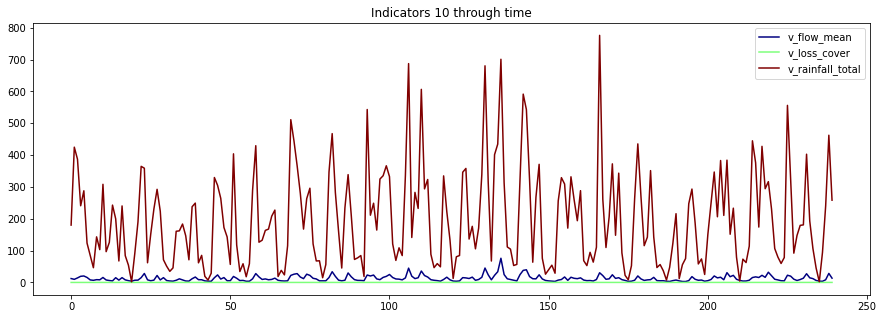

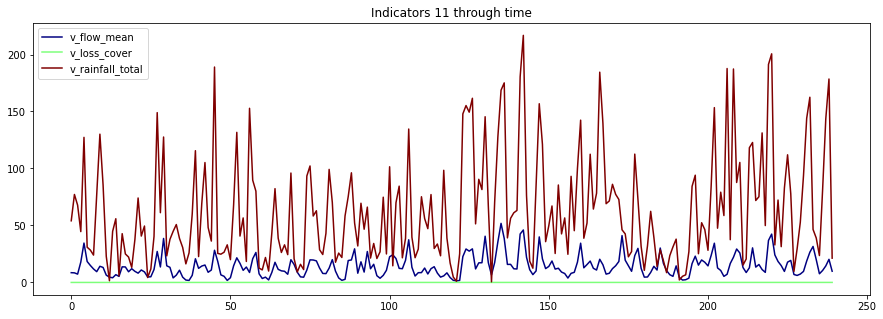

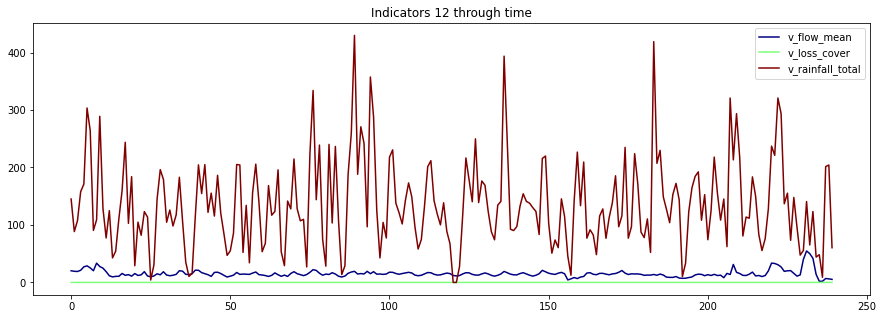

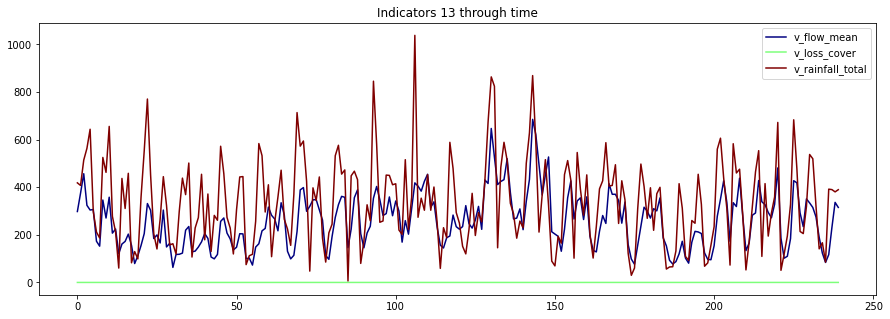

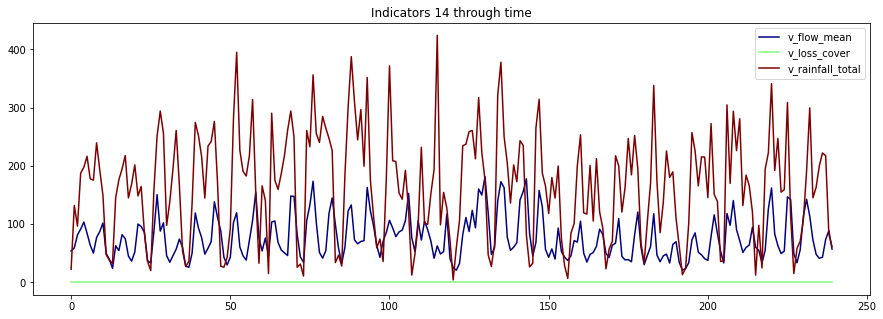

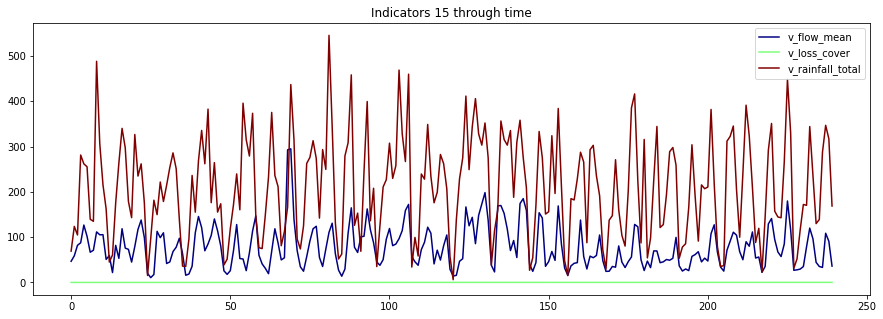

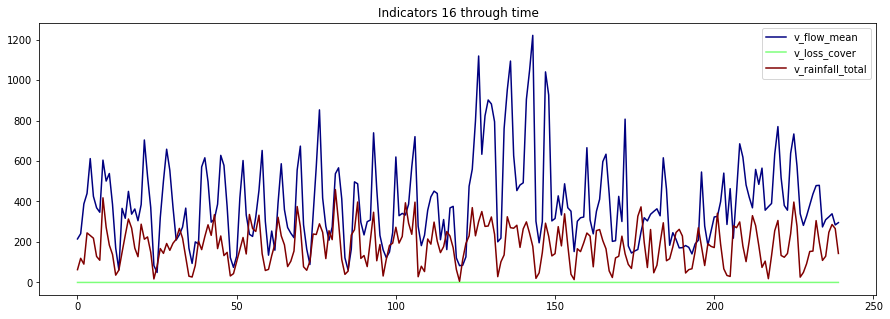

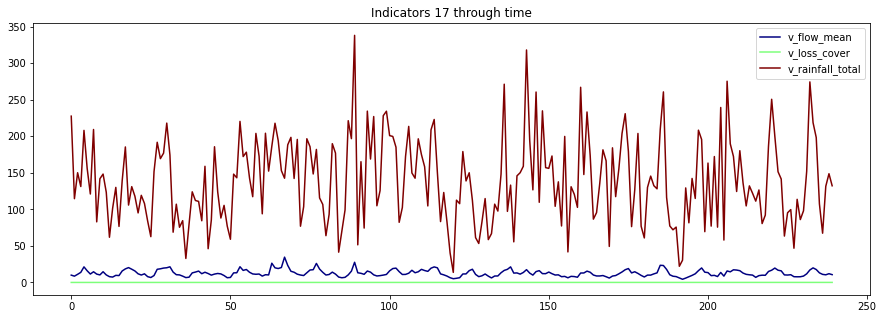

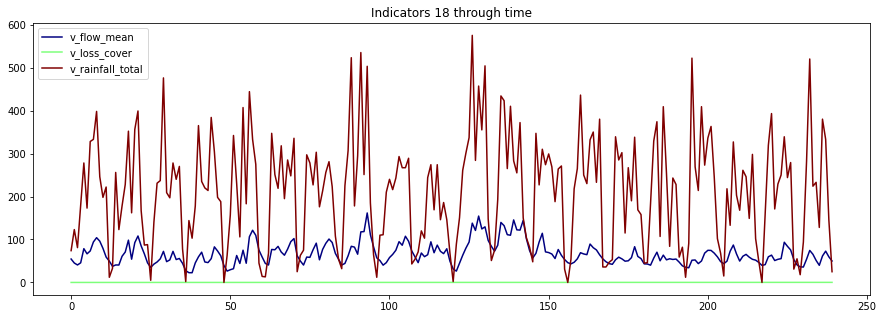

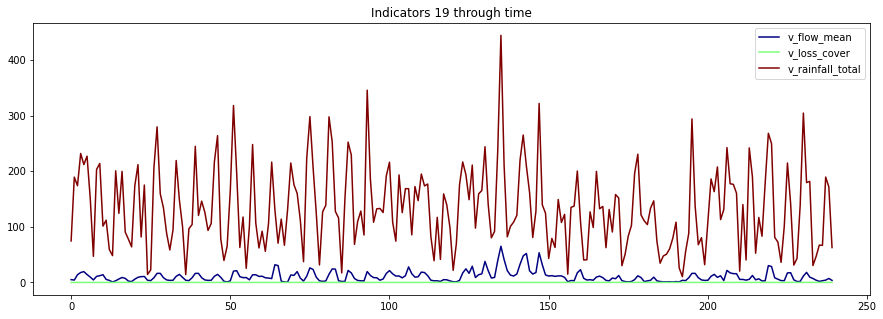

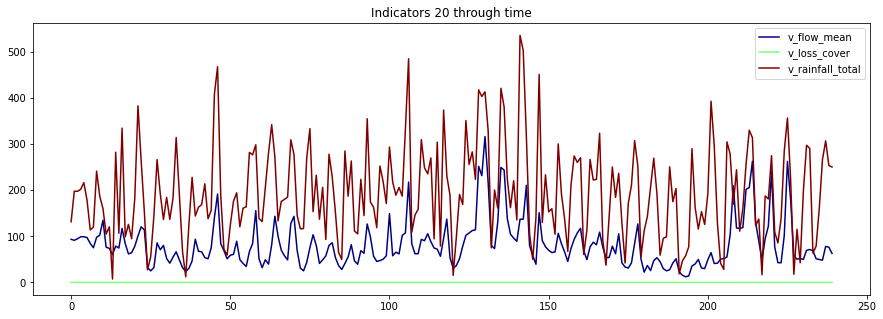

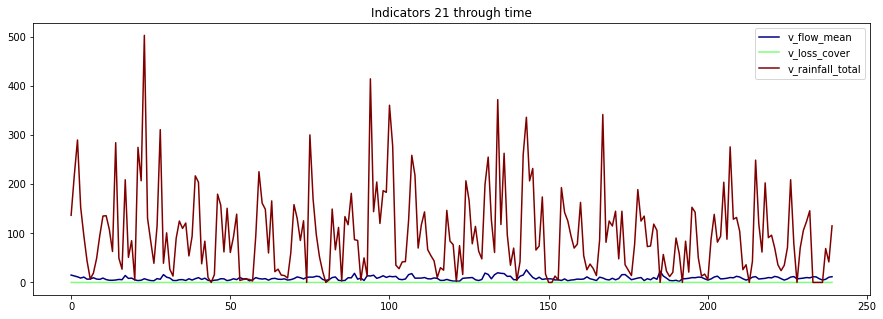

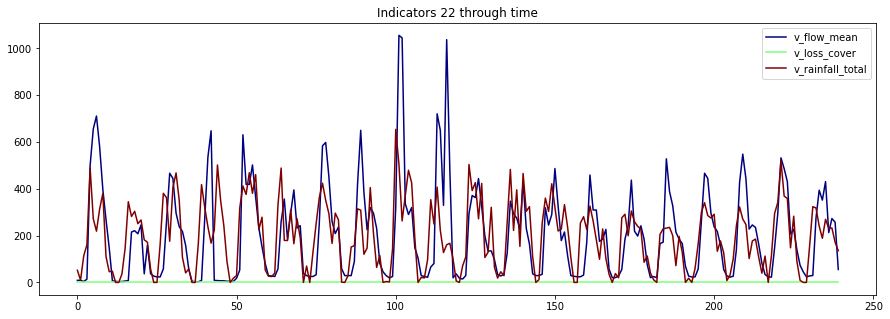

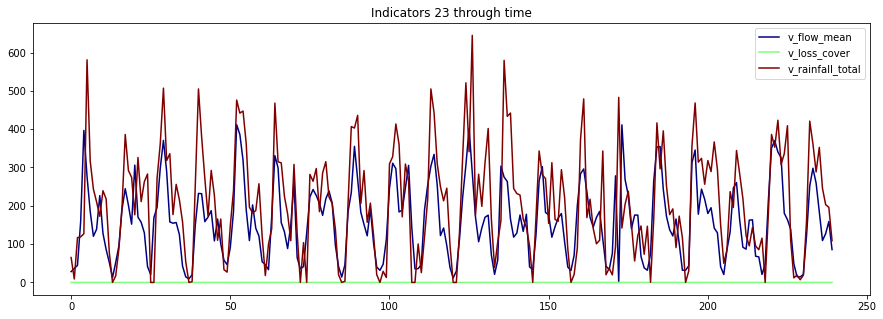

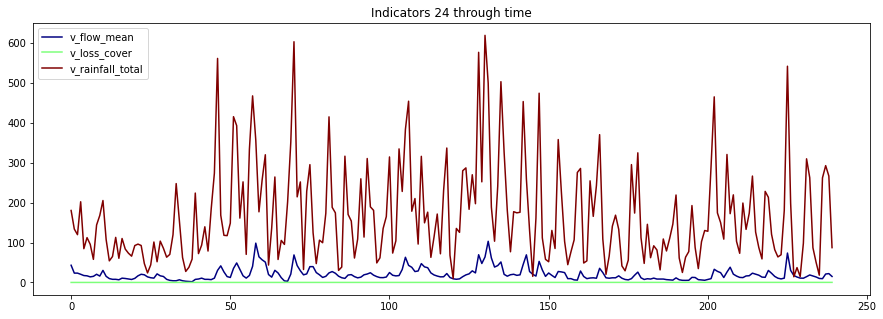

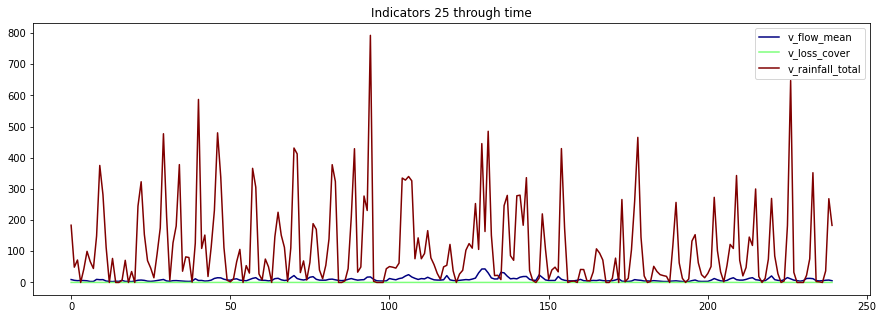

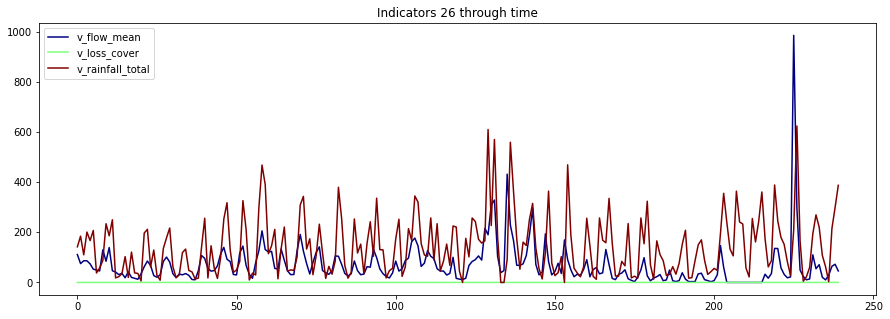

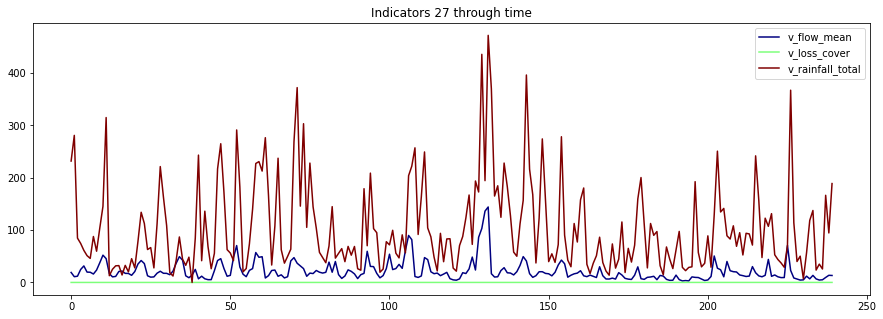

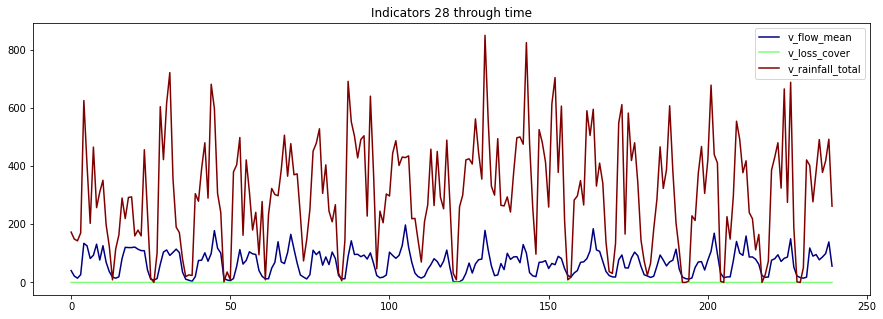

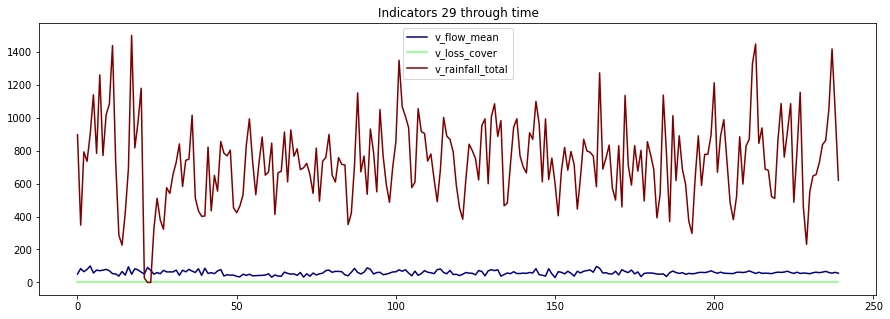

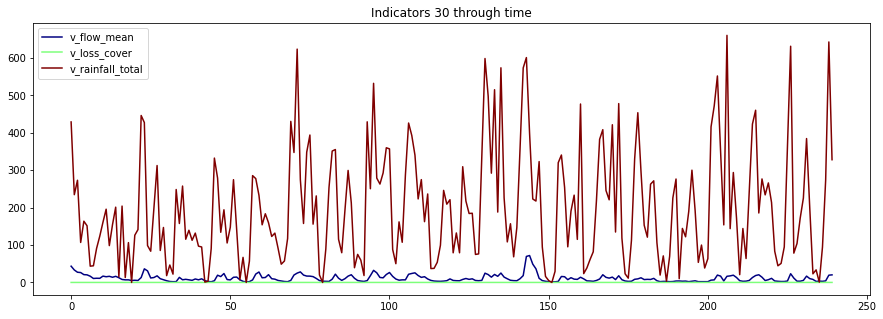

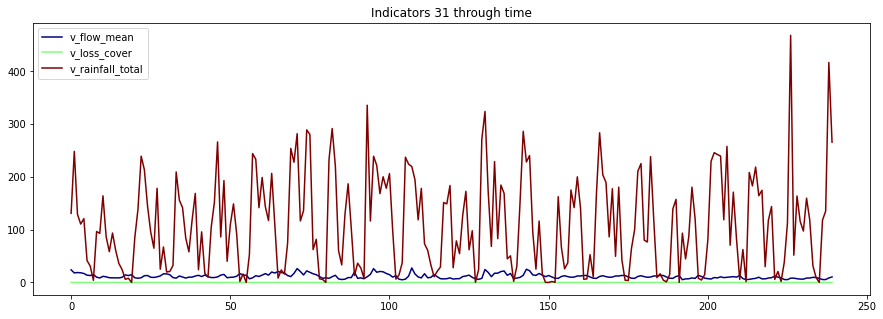

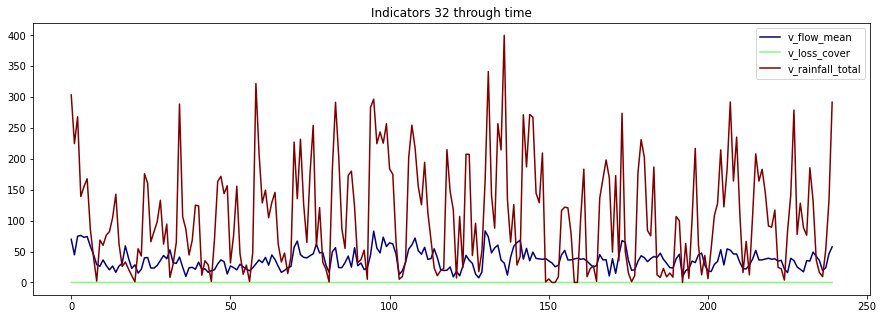

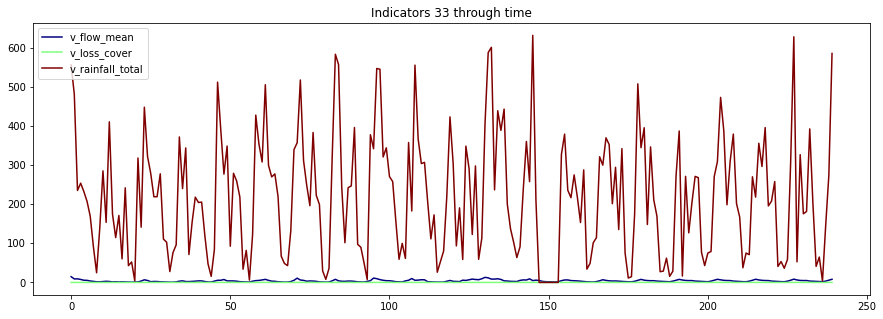

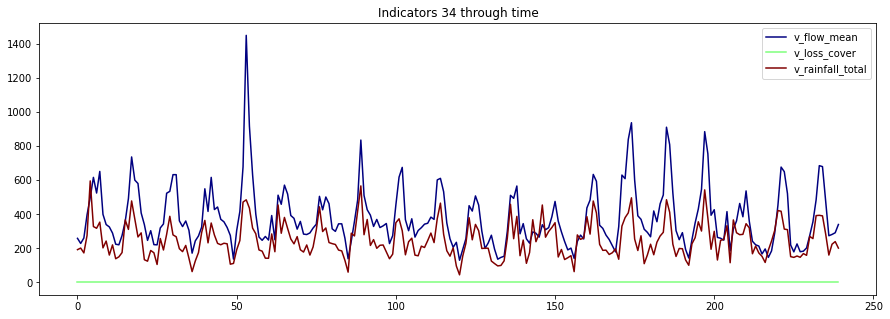

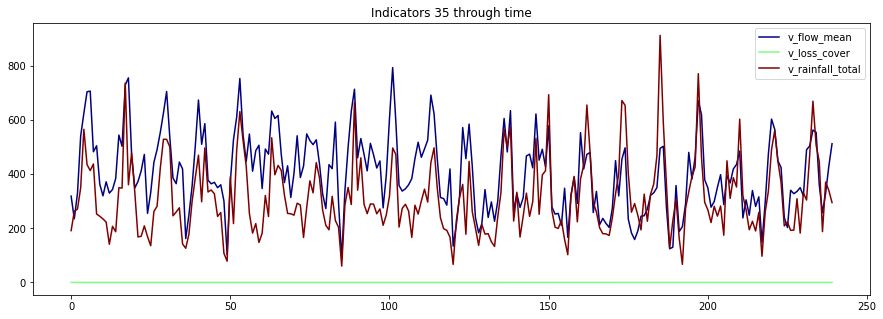

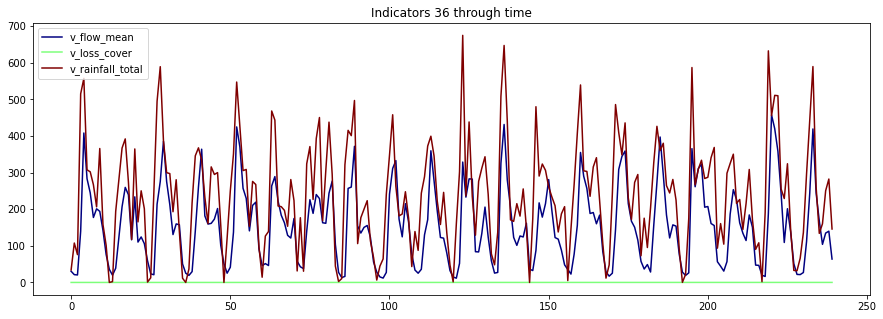

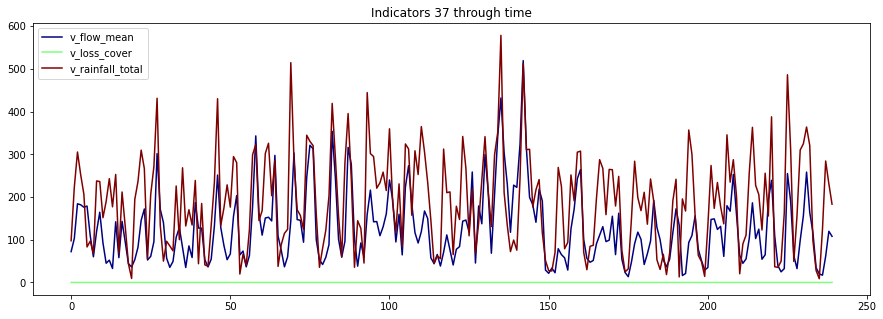

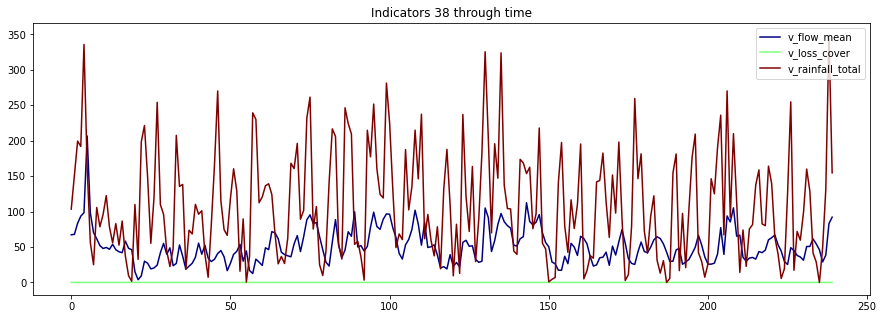

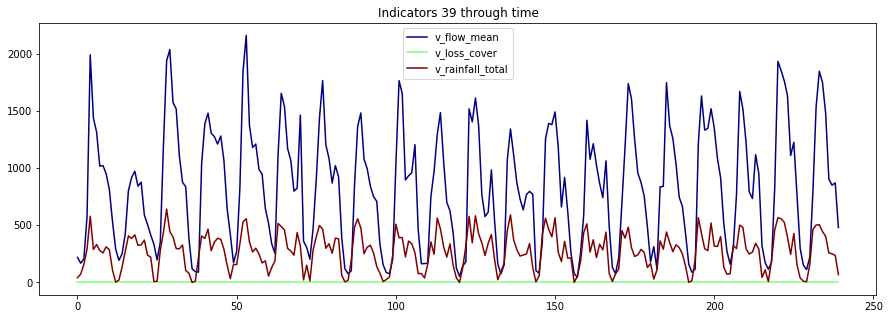

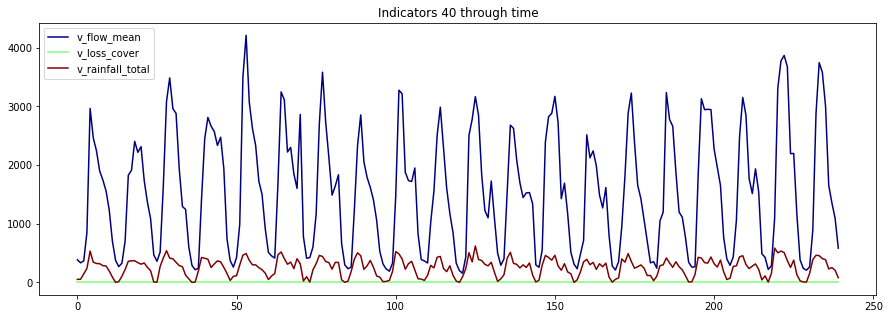

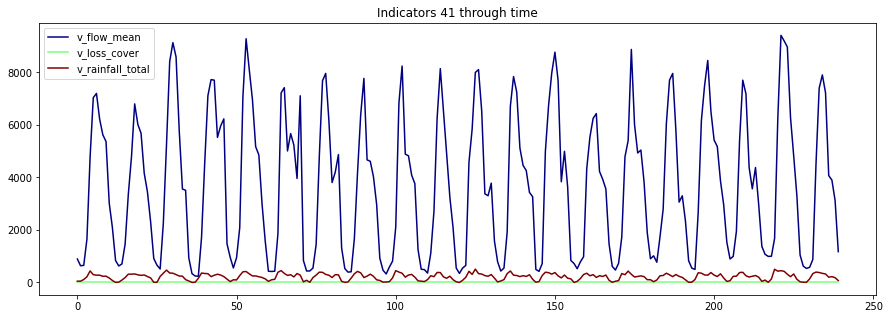

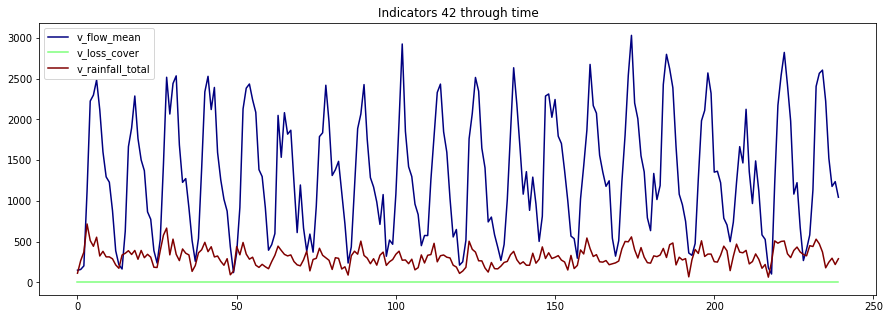

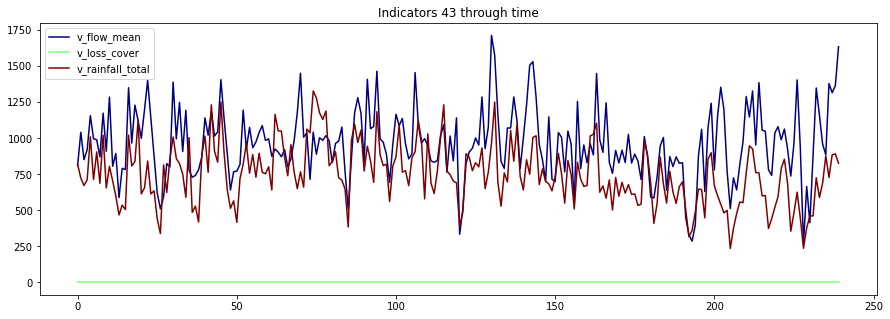

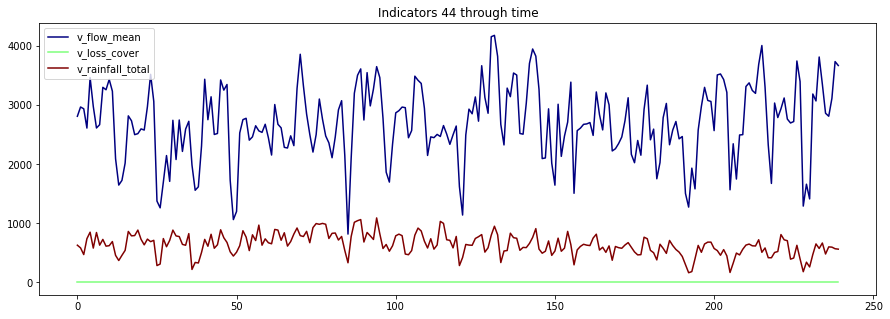

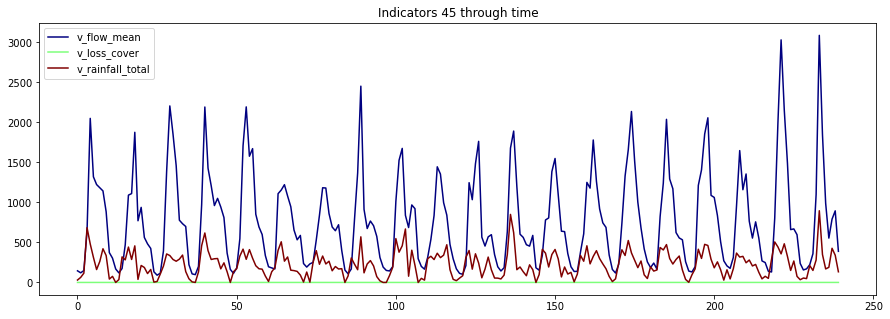

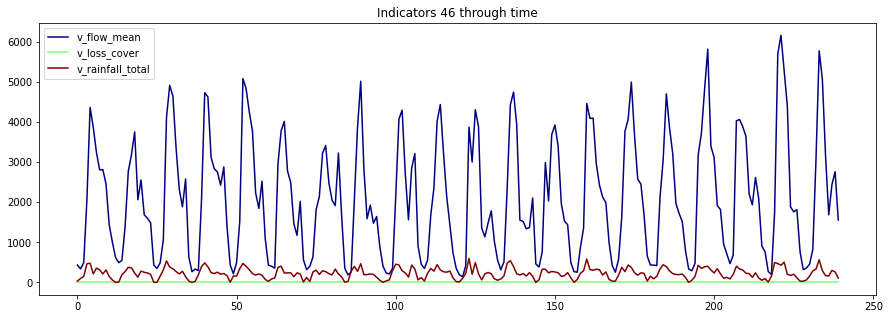

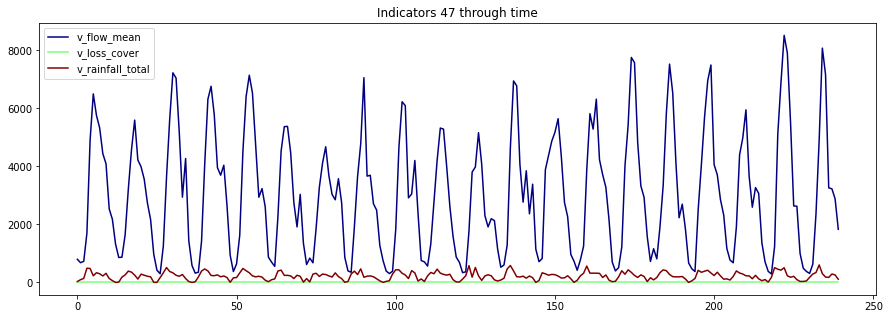

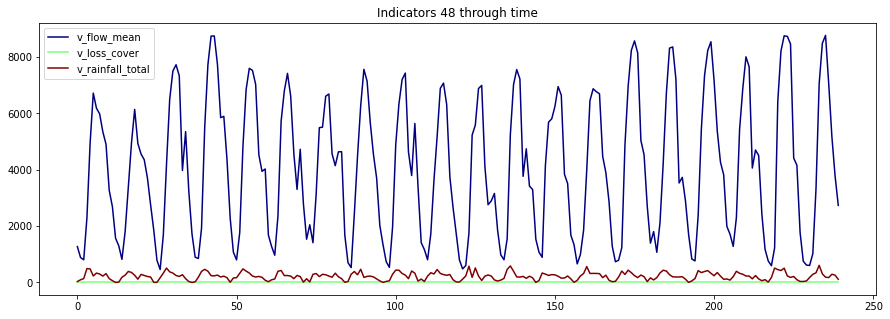

In [14]:
for i in mcs:
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover', 
                                     'v_rainfall_total']].copy().reset_index(drop = True)
    fig, ax = plt.subplots(figsize=(15,5))
    main_title = 'Indicators ' + str(i) + ' through time'
    temp_df.plot(colormap = 'jet', title = main_title, ax = ax)
    plt.show()

### Granger's Causality Test

Causalidad de Wiener-Granger o Test de Wiener-Granger: Desarrollado por el Premio en Ciencias Económicas en memoria de Alfred Nobel (año 2003) Clive W. J. Granger (1934-2009), a partir de las indicaciones de Norbert Wiener. Es un test consistente en comprobar si los resultados de una variable sirven para predecir a otra variable, si tiene carácter unidireccional o bidireccional. Para ello se tiene que comparar y deducir si el comportamiento actual y el pasado de una serie temporal A predice la conducta de una serie temporal B. Si ocurre el hecho, se dice que “el resultado A” causa en el sentido de Wiener-Granger “el resultado B”; el comportamiento es unidireccional. Si sucede lo explicado e igualmente “el resultado B” predice “el resultado A”, el comportamiento es bidireccional, entonces “el resultado A” causa “el resultado B”, y “el resultado B” causa “el resultado A”. 

https://www.analyticslane.com/2019/11/18/test-de-causalidad-de-wiener-granger/

$H_0 $ : NO existe una relación entre las variables.

$H_a $ : SI existe una relación entre las variables.

Si p-value < $\alpha$ (0.05) se rechaza $H_0 $; lo que implica que SI hay relación entre las variables.

In [15]:
from statsmodels.tsa.stattools import grangercausalitytests

#### v_flow_mean vs v_loss_cover

In [16]:
for i in mcs:
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover']].copy().reset_index(drop = True)
    
    print('MC = ', i)
    print('-------')
    granger_test = sm.tsa.stattools.grangercausalitytests(temp_df, maxlag = 12, 
                                                          verbose = True)
    granger_test
    print('\n')

MC =  1
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1392  , p=0.2869  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=1.1537  , p=0.2828  , df=1
likelihood ratio test: chi2=1.1509  , p=0.2834  , df=1
parameter F test:         F=1.1392  , p=0.2869  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0154  , p=0.3638  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=2.0745  , p=0.3544  , df=2
likelihood ratio test: chi2=2.0655  , p=0.3560  , df=2
parameter F test:         F=1.0154  , p=0.3638  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1020  , p=0.3491  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=3.4067  , p=0.3331  , df=3
likelihood ratio test: chi2=3.3825  , p=0.3363  , df=3
parameter F test:         F=1.1020  , p=0.3491  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.92

MC =  4
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2695  , p=0.1333  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=2.2984  , p=0.1295  , df=1
likelihood ratio test: chi2=2.2874  , p=0.1304  , df=1
parameter F test:         F=2.2695  , p=0.1333  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7689  , p=0.1728  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=3.6138  , p=0.1642  , df=2
likelihood ratio test: chi2=3.5866  , p=0.1664  , df=2
parameter F test:         F=1.7689  , p=0.1728  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9240  , p=0.1264  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=5.9475  , p=0.1142  , df=3
likelihood ratio test: chi2=5.8741  , p=0.1179  , df=3
parameter F test:         F=1.9240  , p=0.1264  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.16

likelihood ratio test: chi2=23.0514 , p=0.0174  , df=11
parameter F test:         F=1.9833  , p=0.0315  , df_denom=206, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=2.5371  , p=0.0039  , df_denom=203, df_num=12
ssr based chi2 test:   chi2=34.1944 , p=0.0006  , df=12
likelihood ratio test: chi2=31.8609 , p=0.0015  , df=12
parameter F test:         F=2.5371  , p=0.0039  , df_denom=203, df_num=12


MC =  8
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9006  , p=0.3436  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=0.9120  , p=0.3396  , df=1
likelihood ratio test: chi2=0.9103  , p=0.3400  , df=1
parameter F test:         F=0.9006  , p=0.3436  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1778  , p=0.1156  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=4.4490  , p=0.1081  , df=2
likelihood ratio test: chi2=4.4079  , p=0.1104  , df=2
parameter F te

MC =  11
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8860  , p=0.0499  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=3.9353  , p=0.0473  , df=1
likelihood ratio test: chi2=3.9033  , p=0.0482  , df=1
parameter F test:         F=3.8860  , p=0.0499  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9743  , p=0.0530  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=6.0762  , p=0.0479  , df=2
likelihood ratio test: chi2=6.0000  , p=0.0498  , df=2
parameter F test:         F=2.9743  , p=0.0530  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4538  , p=0.0640  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=7.5856  , p=0.0554  , df=3
likelihood ratio test: chi2=7.4667  , p=0.0584  , df=3
parameter F test:         F=2.4538  , p=0.0640  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0

ssr based F test:         F=1.0101  , p=0.3658  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=2.0636  , p=0.3564  , df=2
likelihood ratio test: chi2=2.0547  , p=0.3580  , df=2
parameter F test:         F=1.0101  , p=0.3658  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8416  , p=0.4723  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=2.6016  , p=0.4572  , df=3
likelihood ratio test: chi2=2.5874  , p=0.4597  , df=3
parameter F test:         F=0.8416  , p=0.4723  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4960  , p=0.7387  , df_denom=227, df_num=4
ssr based chi2 test:   chi2=2.0625  , p=0.7243  , df=4
likelihood ratio test: chi2=2.0535  , p=0.7259  , df=4
parameter F test:         F=0.4960  , p=0.7387  , df_denom=227, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.6131  , p=0.6900  , df_denom=224, df_num=5
ssr based chi2 test: 

ssr based F test:         F=1.1154  , p=0.3542  , df_denom=221, df_num=6
ssr based chi2 test:   chi2=7.0858  , p=0.3130  , df=6
likelihood ratio test: chi2=6.9807  , p=0.3226  , df=6
parameter F test:         F=1.1154  , p=0.3542  , df_denom=221, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.5180  , p=0.1623  , df_denom=218, df_num=7
ssr based chi2 test:   chi2=11.3570 , p=0.1238  , df=7
likelihood ratio test: chi2=11.0889 , p=0.1348  , df=7
parameter F test:         F=1.5180  , p=0.1623  , df_denom=218, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.3516  , p=0.2195  , df_denom=215, df_num=8
ssr based chi2 test:   chi2=11.6680 , p=0.1666  , df=8
likelihood ratio test: chi2=11.3841 , p=0.1809  , df=8
parameter F test:         F=1.3516  , p=0.2195  , df_denom=215, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=1.4621  , p=0.1637  , df_denom=212, df_num=9
ssr based chi2 test: 

ssr based F test:         F=2.2599  , p=0.0105  , df_denom=203, df_num=12
ssr based chi2 test:   chi2=30.4592 , p=0.0024  , df=12
likelihood ratio test: chi2=28.5894 , p=0.0045  , df=12
parameter F test:         F=2.2599  , p=0.0105  , df_denom=203, df_num=12


MC =  23
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0136  , p=0.9074  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=0.0137  , p=0.9067  , df=1
likelihood ratio test: chi2=0.0137  , p=0.9067  , df=1
parameter F test:         F=0.0136  , p=0.9074  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0070  , p=0.9930  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=0.0143  , p=0.9929  , df=2
likelihood ratio test: chi2=0.0143  , p=0.9929  , df=2
parameter F test:         F=0.0070  , p=0.9930  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1153  , p=0.9511  , df_denom=230, df_num=

ssr based F test:         F=0.4749  , p=0.9173  , df_denom=206, df_num=11
ssr based chi2 test:   chi2=5.8076  , p=0.8859  , df=11
likelihood ratio test: chi2=5.7352  , p=0.8904  , df=11
parameter F test:         F=0.4749  , p=0.9173  , df_denom=206, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=0.6635  , p=0.7851  , df_denom=203, df_num=12
ssr based chi2 test:   chi2=8.9431  , p=0.7078  , df=12
likelihood ratio test: chi2=8.7721  , p=0.7223  , df=12
parameter F test:         F=0.6635  , p=0.7851  , df_denom=203, df_num=12


MC =  27
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3149  , p=0.1295  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=2.3444  , p=0.1257  , df=1
likelihood ratio test: chi2=2.3329  , p=0.1267  , df=1
parameter F test:         F=2.3149  , p=0.1295  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7578  , p=0.1747  , df_denom=233, df

ssr based F test:         F=6.3327  , p=0.0001  , df_denom=227, df_num=4
ssr based chi2 test:   chi2=26.3350 , p=0.0000  , df=4
likelihood ratio test: chi2=24.9666 , p=0.0001  , df=4
parameter F test:         F=6.3327  , p=0.0001  , df_denom=227, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=5.6028  , p=0.0001  , df_denom=224, df_num=5
ssr based chi2 test:   chi2=29.3898 , p=0.0000  , df=5
likelihood ratio test: chi2=27.6922 , p=0.0000  , df=5
parameter F test:         F=5.6028  , p=0.0001  , df_denom=224, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=5.2227  , p=0.0000  , df_denom=221, df_num=6
ssr based chi2 test:   chi2=33.1794 , p=0.0000  , df=6
likelihood ratio test: chi2=31.0283 , p=0.0000  , df=6
parameter F test:         F=5.2227  , p=0.0000  , df_denom=221, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=5.1952  , p=0.0000  , df_denom=218, df_num=7
ssr based chi2 test: 

likelihood ratio test: chi2=10.9868 , p=0.5300  , df=12
parameter F test:         F=0.8351  , p=0.6141  , df_denom=203, df_num=12


MC =  34
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3661  , p=0.5457  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=0.3707  , p=0.5426  , df=1
likelihood ratio test: chi2=0.3704  , p=0.5428  , df=1
parameter F test:         F=0.3661  , p=0.5457  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4576  , p=0.6334  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=0.9349  , p=0.6266  , df=2
likelihood ratio test: chi2=0.9330  , p=0.6272  , df=2
parameter F test:         F=0.4576  , p=0.6334  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8087  , p=0.4902  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=2.5000  , p=0.4753  , df=3
likelihood ratio test: chi2=2.4869  , p=0.4777  , df=3
parameter F test: 

ssr based F test:         F=0.6430  , p=0.6671  , df_denom=224, df_num=5
ssr based chi2 test:   chi2=3.3730  , p=0.6427  , df=5
likelihood ratio test: chi2=3.3491  , p=0.6463  , df=5
parameter F test:         F=0.6430  , p=0.6671  , df_denom=224, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.2669  , p=0.2737  , df_denom=221, df_num=6
ssr based chi2 test:   chi2=8.0488  , p=0.2346  , df=6
likelihood ratio test: chi2=7.9134  , p=0.2445  , df=6
parameter F test:         F=1.2669  , p=0.2737  , df_denom=221, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.9247  , p=0.4881  , df_denom=218, df_num=7
ssr based chi2 test:   chi2=6.9184  , p=0.4374  , df=7
likelihood ratio test: chi2=6.8177  , p=0.4481  , df=7
parameter F test:         F=0.9247  , p=0.4881  , df_denom=218, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.8203  , p=0.5854  , df_denom=215, df_num=8
ssr based chi2 test: 

MC =  41
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0312  , p=0.8600  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=0.0316  , p=0.8590  , df=1
likelihood ratio test: chi2=0.0316  , p=0.8590  , df=1
parameter F test:         F=0.0312  , p=0.8600  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0017  , p=0.9983  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=0.0034  , p=0.9983  , df=2
likelihood ratio test: chi2=0.0034  , p=0.9983  , df=2
parameter F test:         F=0.0017  , p=0.9983  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1627  , p=0.9214  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=0.5031  , p=0.9182  , df=3
likelihood ratio test: chi2=0.5026  , p=0.9183  , df=3
parameter F test:         F=0.1627  , p=0.9214  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3

likelihood ratio test: chi2=15.9908 , p=0.1917  , df=12
parameter F test:         F=1.2290  , p=0.2650  , df_denom=203, df_num=12


MC =  45
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0146  , p=0.9040  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=0.0148  , p=0.9033  , df=1
likelihood ratio test: chi2=0.0148  , p=0.9033  , df=1
parameter F test:         F=0.0146  , p=0.9040  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0604  , p=0.9414  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=0.1234  , p=0.9402  , df=2
likelihood ratio test: chi2=0.1234  , p=0.9402  , df=2
parameter F test:         F=0.0604  , p=0.9414  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0802  , p=0.9707  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=0.2478  , p=0.9695  , df=3
likelihood ratio test: chi2=0.2476  , p=0.9696  , df=3
parameter F test: 

ssr based F test:         F=0.4127  , p=0.7994  , df_denom=227, df_num=4
ssr based chi2 test:   chi2=1.7161  , p=0.7878  , df=4
likelihood ratio test: chi2=1.7099  , p=0.7889  , df=4
parameter F test:         F=0.4127  , p=0.7994  , df_denom=227, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.4862  , p=0.7864  , df_denom=224, df_num=5
ssr based chi2 test:   chi2=2.5502  , p=0.7689  , df=5
likelihood ratio test: chi2=2.5365  , p=0.7710  , df=5
parameter F test:         F=0.4862  , p=0.7864  , df_denom=224, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.5389  , p=0.7783  , df_denom=221, df_num=6
ssr based chi2 test:   chi2=3.4236  , p=0.7541  , df=6
likelihood ratio test: chi2=3.3988  , p=0.7574  , df=6
parameter F test:         F=0.5389  , p=0.7783  , df_denom=221, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.6534  , p=0.1219  , df_denom=218, df_num=7
ssr based chi2 test: 

#### v_flow_mean vs v_rainfall_total

In [17]:
for i in mcs:
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_rainfall_total']].copy().reset_index(drop = True)
    
    print('MC = ', i)
    print('-------')
    granger_test = sm.tsa.stattools.grangercausalitytests(temp_df, maxlag = 12, 
                                                          verbose = True)
    granger_test
    print('\n')

MC =  1
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1743  , p=0.6767  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=0.1766  , p=0.6743  , df=1
likelihood ratio test: chi2=0.1765  , p=0.6744  , df=1
parameter F test:         F=0.1743  , p=0.6767  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3424  , p=0.7104  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=0.6996  , p=0.7048  , df=2
likelihood ratio test: chi2=0.6986  , p=0.7052  , df=2
parameter F test:         F=0.3424  , p=0.7104  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3942  , p=0.0691  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=7.4012  , p=0.0602  , df=3
likelihood ratio test: chi2=7.2880  , p=0.0633  , df=3
parameter F test:         F=2.3942  , p=0.0691  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.62

ssr based F test:         F=4.4752  , p=0.0017  , df_denom=227, df_num=4
ssr based chi2 test:   chi2=18.6105 , p=0.0009  , df=4
likelihood ratio test: chi2=17.9132 , p=0.0013  , df=4
parameter F test:         F=4.4752  , p=0.0017  , df_denom=227, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.6044  , p=0.1599  , df_denom=224, df_num=5
ssr based chi2 test:   chi2=8.4161  , p=0.1347  , df=5
likelihood ratio test: chi2=8.2689  , p=0.1420  , df=5
parameter F test:         F=1.6044  , p=0.1599  , df_denom=224, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.9394  , p=0.4675  , df_denom=221, df_num=6
ssr based chi2 test:   chi2=5.9682  , p=0.4268  , df=6
likelihood ratio test: chi2=5.8934  , p=0.4352  , df=6
parameter F test:         F=0.9394  , p=0.4675  , df_denom=221, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.1232  , p=0.3495  , df_denom=218, df_num=7
ssr based chi2 test: 

parameter F test:         F=3.3927  , p=0.0002  , df_denom=206, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=3.2691  , p=0.0002  , df_denom=203, df_num=12
ssr based chi2 test:   chi2=44.0603 , p=0.0000  , df=12
likelihood ratio test: chi2=40.2826 , p=0.0001  , df=12
parameter F test:         F=3.2691  , p=0.0002  , df_denom=203, df_num=12


MC =  8
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0698  , p=0.0253  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=5.1342  , p=0.0235  , df=1
likelihood ratio test: chi2=5.0798  , p=0.0242  , df=1
parameter F test:         F=5.0698  , p=0.0253  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7785  , p=0.1712  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=3.6333  , p=0.1626  , df=2
likelihood ratio test: chi2=3.6058  , p=0.1648  , df=2
parameter F test:         F=1.7785  , p=0.1712  , df_denom=233, df_num

parameter F test:         F=1.8540  , p=0.1195  , df_denom=227, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1870  , p=0.3164  , df_denom=224, df_num=5
ssr based chi2 test:   chi2=6.2263  , p=0.2848  , df=5
likelihood ratio test: chi2=6.1453  , p=0.2923  , df=5
parameter F test:         F=1.1870  , p=0.3164  , df_denom=224, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.7935  , p=0.0013  , df_denom=221, df_num=6
ssr based chi2 test:   chi2=24.0999 , p=0.0005  , df=6
likelihood ratio test: chi2=22.9380 , p=0.0008  , df=6
parameter F test:         F=3.7935  , p=0.0013  , df_denom=221, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=3.2292  , p=0.0028  , df_denom=218, df_num=7
ssr based chi2 test:   chi2=24.1601 , p=0.0011  , df=7
likelihood ratio test: chi2=22.9878 , p=0.0017  , df=7
parameter F test:         F=3.2292  , p=0.0028  , df_denom=218, df_num=7

Granger Causality
nu

ssr based F test:         F=1.3540  , p=0.1908  , df_denom=203, df_num=12
ssr based chi2 test:   chi2=18.2483 , p=0.1084  , df=12
likelihood ratio test: chi2=17.5548 , p=0.1299  , df=12
parameter F test:         F=1.3540  , p=0.1908  , df_denom=203, df_num=12


MC =  15
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.0862 , p=0.0000  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=17.3034 , p=0.0000  , df=1
likelihood ratio test: chi2=16.7057 , p=0.0000  , df=1
parameter F test:         F=17.0862 , p=0.0000  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.4542  , p=0.0048  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=11.1425 , p=0.0038  , df=2
likelihood ratio test: chi2=10.8895 , p=0.0043  , df=2
parameter F test:         F=5.4542  , p=0.0048  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2265  , p=0.0233  , df_denom=230, df_num=

ssr based F test:         F=2.0889  , p=0.0831  , df_denom=227, df_num=4
ssr based chi2 test:   chi2=8.6867  , p=0.0694  , df=4
likelihood ratio test: chi2=8.5307  , p=0.0740  , df=4
parameter F test:         F=2.0889  , p=0.0831  , df_denom=227, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.6993  , p=0.1358  , df_denom=224, df_num=5
ssr based chi2 test:   chi2=8.9139  , p=0.1125  , df=5
likelihood ratio test: chi2=8.7490  , p=0.1195  , df=5
parameter F test:         F=1.6993  , p=0.1358  , df_denom=224, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.6397  , p=0.1373  , df_denom=221, df_num=6
ssr based chi2 test:   chi2=10.4166 , p=0.1082  , df=6
likelihood ratio test: chi2=10.1914 , p=0.1168  , df=6
parameter F test:         F=1.6397  , p=0.1373  , df_denom=221, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.4492  , p=0.0195  , df_denom=218, df_num=7
ssr based chi2 test: 

ssr based F test:         F=2.4377  , p=0.0056  , df_denom=203, df_num=12
ssr based chi2 test:   chi2=32.8544 , p=0.0010  , df=12
likelihood ratio test: chi2=30.6926 , p=0.0022  , df=12
parameter F test:         F=2.4377  , p=0.0056  , df_denom=203, df_num=12


MC =  22
-------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=55.5569 , p=0.0000  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=56.2631 , p=0.0000  , df=1
likelihood ratio test: chi2=50.5254 , p=0.0000  , df=1
parameter F test:         F=55.5569 , p=0.0000  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.9275 , p=0.0000  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=50.9249 , p=0.0000  , df=2
likelihood ratio test: chi2=46.1473 , p=0.0000  , df=2
parameter F test:         F=24.9275 , p=0.0000  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=18.7722 , p=0.0000  , df_denom=230, df_num=

ssr based F test:         F=0.7834  , p=0.6178  , df_denom=215, df_num=8
ssr based chi2 test:   chi2=6.7625  , p=0.5625  , df=8
likelihood ratio test: chi2=6.6659  , p=0.5731  , df=8
parameter F test:         F=0.7834  , p=0.6178  , df_denom=215, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.7042  , p=0.7047  , df_denom=212, df_num=9
ssr based chi2 test:   chi2=6.9059  , p=0.6469  , df=9
likelihood ratio test: chi2=6.8047  , p=0.6574  , df=9
parameter F test:         F=0.7042  , p=0.7047  , df_denom=212, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.5935  , p=0.8183  , df_denom=209, df_num=10
ssr based chi2 test:   chi2=6.5314  , p=0.7688  , df=10
likelihood ratio test: chi2=6.4404  , p=0.7770  , df=10
parameter F test:         F=0.5935  , p=0.8183  , df_denom=209, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=0.5810  , p=0.8432  , df_denom=206, df_num=11
ssr based chi2

likelihood ratio test: chi2=9.2429  , p=0.0998  , df=5
parameter F test:         F=1.7972  , p=0.1144  , df_denom=224, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.2537  , p=0.0393  , df_denom=221, df_num=6
ssr based chi2 test:   chi2=14.3177 , p=0.0263  , df=6
likelihood ratio test: chi2=13.8968 , p=0.0308  , df=6
parameter F test:         F=2.2537  , p=0.0393  , df_denom=221, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.4486  , p=0.0195  , df_denom=218, df_num=7
ssr based chi2 test:   chi2=18.3197 , p=0.0106  , df=7
likelihood ratio test: chi2=17.6352 , p=0.0137  , df=7
parameter F test:         F=2.4486  , p=0.0195  , df_denom=218, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=1.8677  , p=0.0664  , df_denom=215, df_num=8
ssr based chi2 test:   chi2=16.1231 , p=0.0407  , df=8
likelihood ratio test: chi2=15.5875 , p=0.0487  , df=8
parameter F test:         F=1.8677  , p

ssr based F test:         F=12.3879 , p=0.0000  , df_denom=227, df_num=4
ssr based chi2 test:   chi2=51.5162 , p=0.0000  , df=4
likelihood ratio test: chi2=46.5975 , p=0.0000  , df=4
parameter F test:         F=12.3879 , p=0.0000  , df_denom=227, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=11.9112 , p=0.0000  , df_denom=224, df_num=5
ssr based chi2 test:   chi2=62.4808 , p=0.0000  , df=5
likelihood ratio test: chi2=55.4045 , p=0.0000  , df=5
parameter F test:         F=11.9112 , p=0.0000  , df_denom=224, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=10.3279 , p=0.0000  , df_denom=221, df_num=6
ssr based chi2 test:   chi2=65.6128 , p=0.0000  , df=6
likelihood ratio test: chi2=57.8377 , p=0.0000  , df=6
parameter F test:         F=10.3279 , p=0.0000  , df_denom=221, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=9.0037  , p=0.0000  , df_denom=218, df_num=7
ssr based chi2 test: 

parameter F test:         F=7.0051  , p=0.0011  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.4301  , p=0.0001  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=22.9689 , p=0.0000  , df=3
likelihood ratio test: chi2=21.9229 , p=0.0001  , df=3
parameter F test:         F=7.4301  , p=0.0001  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.6358  , p=0.0002  , df_denom=227, df_num=4
ssr based chi2 test:   chi2=23.4370 , p=0.0001  , df=4
likelihood ratio test: chi2=22.3449 , p=0.0002  , df=4
parameter F test:         F=5.6358  , p=0.0002  , df_denom=227, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.4188  , p=0.0054  , df_denom=224, df_num=5
ssr based chi2 test:   chi2=17.9336 , p=0.0030  , df=5
likelihood ratio test: chi2=17.2822 , p=0.0040  , df=5
parameter F test:         F=3.4188  , p=0.0054  , df_denom=224, df_num=5

Granger Causality
nu

likelihood ratio test: chi2=93.7324 , p=0.0000  , df=9
parameter F test:         F=11.7885 , p=0.0000  , df_denom=212, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=9.8715  , p=0.0000  , df_denom=209, df_num=10
ssr based chi2 test:   chi2=108.6340, p=0.0000  , df=10
likelihood ratio test: chi2=88.9734 , p=0.0000  , df=10
parameter F test:         F=9.8715  , p=0.0000  , df_denom=209, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=6.4375  , p=0.0000  , df_denom=206, df_num=11
ssr based chi2 test:   chi2=78.7184 , p=0.0000  , df=11
likelihood ratio test: chi2=67.6610 , p=0.0000  , df=11
parameter F test:         F=6.4375  , p=0.0000  , df_denom=206, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=4.7822  , p=0.0000  , df_denom=203, df_num=12
ssr based chi2 test:   chi2=64.4539 , p=0.0000  , df=12
likelihood ratio test: chi2=56.7632 , p=0.0000  , df=12
parameter F test:        


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3804  , p=0.0374  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=4.4361  , p=0.0352  , df=1
likelihood ratio test: chi2=4.3954  , p=0.0360  , df=1
parameter F test:         F=4.3804  , p=0.0374  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.5682  , p=0.0007  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=15.4612 , p=0.0004  , df=2
likelihood ratio test: chi2=14.9798 , p=0.0006  , df=2
parameter F test:         F=7.5682  , p=0.0007  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.0494  , p=0.0021  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=15.6092 , p=0.0014  , df=3
likelihood ratio test: chi2=15.1167 , p=0.0017  , df=3
parameter F test:         F=5.0494  , p=0.0021  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7007  , p=0.0061  

ssr based F test:         F=425.5266, p=0.0000  , df_denom=236, df_num=1
ssr based chi2 test:   chi2=430.9358, p=0.0000  , df=1
likelihood ratio test: chi2=246.3417, p=0.0000  , df=1
parameter F test:         F=425.5266, p=0.0000  , df_denom=236, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=114.3662, p=0.0000  , df_denom=233, df_num=2
ssr based chi2 test:   chi2=233.6408, p=0.0000  , df=2
likelihood ratio test: chi2=162.7794, p=0.0000  , df=2
parameter F test:         F=114.3662, p=0.0000  , df_denom=233, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=73.8878 , p=0.0000  , df_denom=230, df_num=3
ssr based chi2 test:   chi2=228.4095, p=0.0000  , df=3
likelihood ratio test: chi2=159.9413, p=0.0000  , df=3
parameter F test:         F=73.8878 , p=0.0000  , df_denom=230, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=61.3160 , p=0.0000  , df_denom=227, df_num=4
ssr based chi2 test: 

### Split data for machine learning algorithms

In [18]:
from sklearn.model_selection import train_test_split

temp_df = data.copy()

data_train = pd.DataFrame()
data_test = pd.DataFrame()

for i in mcs:
    #train, test = train_test_split(temp_df[temp_df['mc'] == i], test_size = 0.2)
    nobs = 48 # 20% de 240
    train, test = temp_df[temp_df['mc'] == i].iloc[0:-nobs], temp_df[temp_df['mc'] == i].iloc[-nobs:]
    data_train = pd.concat([data_train, train], axis = 0)
    data_test = pd.concat([data_test, test], axis = 0)

print('data')
print('----------')
print(data.shape)
print(data.dtypes)
print()
print('data_train')
print('----------')
print(data_train.shape)
print(data_train.dtypes)
print()
print('data_test')
print('---------')
print(data_test.shape)
print(data_test.dtypes)

temp_df.head(10)

data
----------
(11520, 4)
mc                    int64
v_flow_mean         float64
v_loss_cover        float64
v_rainfall_total    float64
dtype: object

data_train
----------
(9216, 4)
mc                    int64
v_flow_mean         float64
v_loss_cover        float64
v_rainfall_total    float64
dtype: object

data_test
---------
(2304, 4)
mc                    int64
v_flow_mean         float64
v_loss_cover        float64
v_rainfall_total    float64
dtype: object


mc  v_flow_mean  v_loss_cover  v_rainfall_total
0   7        230.4      0.000000             334.0
1   7        272.4      0.000133             400.0
2   7        321.6      0.000265             319.0
3   7        310.8      0.000398             248.0
4   7        410.0      0.000531             302.0
5   7        295.9      0.000663              81.0
6   7        244.2      0.000796              96.0
7   7        255.0      0.000928              64.0
8   7        233.8      0.001061             262.0
9   7        216.0      0.001194             141.0

### Stationarity check

Non-stationary data, as a rule, are unpredictable and cannot be modeled or forecasted. The results obtained by using non-stationary time series may be spurious in that they may indicate a relationship between two variables where one does not exist. In order to receive consistent, reliable results, the non-stationary data needs to be transformed into stationary data. In contrast to the non-stationary process that has a variable variance and a mean that does not remain near, or returns to a long-run mean over time, the stationary process reverts around a constant long-term mean and has a constant variance independent of time. 

https://www.investopedia.com/articles/trading/07/stationary.asp


**Augmented Dickey-Fuller Test (ADF) Statistical Test**

To determine if a time series is stationary or not, we will use the ADF test which is a type of unit root test. Unit roots are a cause for non-stationarity, the ADF test will test if unit root is present.

    A time series is stationary if a single shift in time doesn’t change the time series statistical properties, in which case unit root does not exist.

The Null and Alternate hypothesis of the Augmented Dickey-Fuller test is defined as follows:

    $H_0$ : Null Hypothesis states there is the presence of a unit root.
    $H_0$ : Alternate Hypothesis states there is no unit root. In other words, Stationarity exists.

In [19]:
# Augmented Dickey-Fuller Test (ADF Test)/unit root test

from statsmodels.tsa.stattools import adfuller

def adf_test(ts, ts_name, signif = 0.05):
    dftest = adfuller(ts, autolag = 'AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']    
    
    stationary = 0
    
    if p <= signif:
        print(' >>> ', ts_name, 'series is Stationary')
        stationary = 1
    else:
        print(' >>> ', ts_name, 'series is Non-Stationary')
        stationary = 0
    
    print('Size : ', ts.shape)
    print()
    
    return(stationary)

list_stationary = []
    
for i in mcs:
    #temp_df1 = data_train[data_train['mc'] == i][['v_flow_mean']].copy().reset_index(drop = True)
    #temp_df2 = data_train[data_train['mc'] == i][['v_rainfall_total']].copy().reset_index(drop = True)
    #temp_df3 = data_train[data_train['mc'] == i][['v_loss_cover']].copy().reset_index(drop = True)

    temp_df1 = data[data['mc'] == i][['v_flow_mean']].copy().reset_index(drop = True)
    temp_df2 = data[data['mc'] == i][['v_rainfall_total']].copy().reset_index(drop = True)
    temp_df3 = data[data['mc'] == i][['v_loss_cover']].copy().reset_index(drop = True)

    
    print('MC = ', i)
    print('--------------------------------------', '\n')

    #apply adf test on the series
    stationary = adf_test(temp_df1, 'v_flow_mean')
    list_stationary.append([i, 'v_flow_mean', stationary])
    
    stationary = adf_test(temp_df2, 'v_rainfall_total')
    list_stationary.append([i, 'v_rainfall_total', stationary])
    
    stationary = adf_test(temp_df3, 'v_loss_cover')
    list_stationary.append([i, 'v_loss_cover', stationary])
    
    print('\n')

data_train_stationary = pd.DataFrame(list_stationary)
data_train_stationary.columns = ['mc', 'variable', 'stationary']
data_train_stationary = data_train_stationary.set_index(['mc', 'variable', ]).unstack().swaplevel(0, axis = 1).sort_index(axis = 1)

data_train_stationary.head(48)

MC =  1
-------------------------------------- 

Test Statistic           -2.754733
p-value                   0.065036
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_flow_mean series is Non-Stationary
Size :  (240, 1)

Test Statistic           -3.631548
p-value                   0.005186
# Lags                   14.000000
# Observations          225.000000
Critical Value (1%)      -3.459752
Critical Value (5%)      -2.874473
Critical Value (10%)     -2.573663
dtype: float64
 >>>  v_rainfall_total series is Stationary
Size :  (240, 1)

Test Statistic           -1.037547
p-value                   0.739325
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_loss_cover series is Non-Stationary
Size

Test Statistic           -3.400502
p-value                   0.010942
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_flow_mean series is Stationary
Size :  (240, 1)

Test Statistic           -3.323248
p-value                   0.013871
# Lags                   14.000000
# Observations          225.000000
Critical Value (1%)      -3.459752
Critical Value (5%)      -2.874473
Critical Value (10%)     -2.573663
dtype: float64
 >>>  v_rainfall_total series is Stationary
Size :  (240, 1)

Test Statistic            0.885585
p-value                   0.992899
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_loss_cover series is Non-Stationary
Size :  (240, 1)



MC =  11
----------------------------

Test Statistic           -4.199944
p-value                   0.000659
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_flow_mean series is Stationary
Size :  (240, 1)

Test Statistic           -3.423353
p-value                   0.010188
# Lags                   14.000000
# Observations          225.000000
Critical Value (1%)      -3.459752
Critical Value (5%)      -2.874473
Critical Value (10%)     -2.573663
dtype: float64
 >>>  v_rainfall_total series is Stationary
Size :  (240, 1)

Test Statistic            0.757204
p-value                   0.990913
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_loss_cover series is Non-Stationary
Size :  (240, 1)



MC =  22
----------------------------

Test Statistic           -4.100422
p-value                   0.000967
# Lags                   14.000000
# Observations          225.000000
Critical Value (1%)      -3.459752
Critical Value (5%)      -2.874473
Critical Value (10%)     -2.573663
dtype: float64
 >>>  v_rainfall_total series is Stationary
Size :  (240, 1)

Test Statistic           -0.531062
p-value                   0.885811
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_loss_cover series is Non-Stationary
Size :  (240, 1)



MC =  31
-------------------------------------- 

Test Statistic           -3.256907
p-value                   0.016918
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_flow_mean series is Stationary
Size 

Test Statistic           -1.658362
p-value                   0.452683
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_loss_cover series is Non-Stationary
Size :  (240, 1)



MC =  39
-------------------------------------- 

Test Statistic           -3.742663
p-value                   0.003552
# Lags                   15.000000
# Observations          224.000000
Critical Value (1%)      -3.459885
Critical Value (5%)      -2.874531
Critical Value (10%)     -2.573694
dtype: float64
 >>>  v_flow_mean series is Stationary
Size :  (240, 1)

Test Statistic           -4.028771
p-value                   0.001267
# Lags                   14.000000
# Observations          225.000000
Critical Value (1%)      -3.459752
Critical Value (5%)      -2.874473
Critical Value (10%)     -2.573663
dtype: float64
 >>>  v_rainfall_total series is Stationary
Size 

Test Statistic           -5.364051
p-value                   0.000004
# Lags                   15.000000
# Observations          224.000000
Critical Value (1%)      -3.459885
Critical Value (5%)      -2.874531
Critical Value (10%)     -2.573694
dtype: float64
 >>>  v_rainfall_total series is Stationary
Size :  (240, 1)

Test Statistic            1.286613
p-value                   0.996533
# Lags                   13.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_loss_cover series is Non-Stationary
Size :  (240, 1)



MC =  48
-------------------------------------- 

Test Statistic           -2.264909
p-value                   0.183535
# Lags                   11.000000
# Observations          228.000000
Critical Value (1%)      -3.459361
Critical Value (5%)      -2.874302
Critical Value (10%)     -2.573571
dtype: float64
 >>>  v_flow_mean series is Non-Stationary
S

variable v_flow_mean v_loss_cover v_rainfall_total
          stationary   stationary       stationary
mc                                                
1                  0            0                1
2                  1            0                1
3                  1            0                1
4                  0            0                1
5                  1            0                1
6                  1            0                1
7                  1            0                0
8                  1            0                1
9                  1            0                1
10                 1            0                1
11                 1            0                0
12                 1            0                1
13                 0            0                1
14                 1            0                0
15                 1            0                1
16                 1            0                1
17                 1            0                1
18                 0            0                1
19                 1            0                1
20                 1            0                0
21                 1            0                1
22                 1            0                1
23                 1            0                1
24                 1            0                1
25                 0            0                1
26                 1            0                0
27                 1            0                1
28                 1            0                1
29                 1            0                1
30                 1            0                1
31                 1            0                1
32                 1            0                1
33                 1            0                1
34                 0            0                1
35                 0            0                0
36                 1            0                1
37                 1            0                0
38                 1            0                1
39                 1            0                1
40                 1            0                1
41                 1            0                1
42                 1            0                0
43                 1            0                0
44                 1            0                0
45                 1            0                1
46                 1            0                1
47                 0            0                1
48                 0            0                1

### Make data stationery 

http://finanzaszone.com/analisis-y-prediccion-de-series-temporales-con-r-ii-estacionariedad-y-raices-unitarias/

In [20]:
# 1st difference
# df_differenced = df_train.diff().dropna()
# stationarity test again with differenced data
# adf_test(df_differenced["realgdp"])

def ts_difference(mc, dataframe, variable, nro_difference):
    temp_df = dataframe[(dataframe['mc'] == mc)][variable].copy().reset_index(drop = True)
    
    print('MC = ', mc, ' variable = ', variable, ' diff = ', nro_difference)
    print('-------------------------------------------')
    
    df_differenced = temp_df.diff(nro_difference).dropna()
    stationary = adf_test(df_differenced, variable)
    
    return(df_differenced)

mc = 10
variable = 'v_flow_mean'
data_to_analice = data.copy()
nro_dif_to_apply = 1

temp_df_diff = ts_difference(mc, data_to_analice, variable, nro_dif_to_apply)

temp_df = data_to_analice[(data_to_analice['mc'] == mc)][variable].copy().reset_index(drop = True)

print('Original : \n', temp_df.describe(), '\n')
print('Original : \n', temp_df.head(10), '\n')

print('Modificada : \n', temp_df_diff.describe())
print('Modificada : \n', temp_df_diff.head(10), '\n')


MC =  10  variable =  v_flow_mean  diff =  1
-------------------------------------------
Test Statistic           -5.616790
p-value                   0.000001
# Lags                   12.000000
# Observations          226.000000
Critical Value (1%)      -3.459620
Critical Value (5%)      -2.874415
Critical Value (10%)     -2.573632
dtype: float64
 >>>  v_flow_mean series is Stationary
Size :  (239,)

Original : 
 count    240.000000
mean      12.707105
std        9.173464
min        2.887500
25%        6.239625
50%        9.792812
75%       16.393984
max       75.990000
Name: v_flow_mean, dtype: float64 

Original : 
 0    12.20
1     9.75
2    14.20
3    19.30
4    20.30
5    15.70
6     7.90
7     6.70
8     8.75
9     8.30
Name: v_flow_mean, dtype: float64 

Modificada : 
 count    239.000000
mean       0.005280
std        9.734810
min      -51.270000
25%       -4.634250
50%       -0.660000
75%        4.136323
max       42.330000
Name: v_flow_mean, dtype: float64
Modificada : 
 1   

### Modeling

In [ ]:
# model fitting
model = VAR(df_differenced)
results = model.fit(maxlags=15, ic='aic')
results.summary()

### Forecasting

In [ ]:
# forecasting
lag_order = results.k_ar
results.forecast(df.values[-lag_order:], 5)

### Plotting

In [ ]:
# plotting
results.plot_forecast(20)

### Evaluating

In [ ]:
# Evaluation
fevd = results.fevd(5)
fevd.summary()

### Inverting forecast results

In [ ]:
# forecasting
pred = results.forecast(results.y, steps=nobs)
df_forecast = pd.DataFrame(pred, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast.tail()

# inverting transformation
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

# show inverted results in a dataframe
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['realgdp_forecast', 'realcons_forecast']]